In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


## Theory ##

Let's say, we have data $X$, which is a matrix of $N$ values, each having
dimensionality $p$.
Then the covariance matrix $\Sigma$ of $X$ can be computed as:
$$\Sigma = \frac{X^T X}{N-1}$$

### Eigenvalues of covariance matrix ###
We can represent $\Sigma$ as a decomposition using its eigenvalues:

$$\Sigma = V L V^{-1}$$

where $V$ is a matrix of eigenvectors and $L$ is a diagonal matrix of
eigenvalues. For every *covariance matrix* $\Sigma$ the matrix $V$ will
actually be a rotation and thus, $V^{-1} = V^T$. Thus:

$$\Sigma = VLV^{T}$$

You can see an example of getting the eigenvalues from a covariance matrix in
function `plot_cov_ellipse`.

### Relation to SVD ###
We can express our data $X$ as a decomposition using **SVD**:

$$ X = \mathrm{SVD}(X) = USV^T $$

where $U$ is a unitary matrix that holds left-singular vectors, $S$ is a
diagonal matrix of singular values and $V$ is a unitary matrix of
right-singular vectors.

The matrix $V$ is the same as the matrix $V$ from eigenvalue decomposition of
$\Sigma$.

This allows us to find the correspondence between singular values of $X$ to the
eigenvalues of $\Sigma$.

$$ \Sigma = \frac{X^T X}{N-1} = \frac{(USV^T)^T (USV^T)}{N-1} = \frac{VSU^{T} USV^T}{N-1} = V \frac{S^2}{N-1} V^T$$

This looks exactly like the eigenvalue decomposition of the covariance matrix $\Sigma$:

$$ V \frac{S^2}{N-1} V^T = VLV^{T} \Rightarrow L = \frac{S^2}{N-1} $$

### SVD of covariance matrix ###
Singular values *of the covariance matrix* are the same as its eigenvalues.





In [70]:
def plot_cov_ellipse(data, pos, nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        W, V = np.linalg.eig(cov)
        order = W.argsort()[::-1]
        return W[order], V[:,order]
    
    cov = np.cov(data, rowvar=False)

    if ax is None:
        ax = plt.gca()

    W, V = eigsorted(cov)
    print("eigen vals:", W)
    print("eigen vectors:\n", V)
    theta = np.degrees(np.arctan2(*V[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(W)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    ax.set_title('From eigenvalues')
    return ellip

In [71]:
def plot_svd_ellipse(data, pos, nstd=2, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    U, S, V = np.linalg.svd(data)
    V = V.T
    print("singular vals:", S)
    print("singular vectors:\n", V)
    theta = np.degrees(np.arctan2(*V[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * (S / np.sqrt(data.shape[0]))
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    ax.set_title('From singular values')
    return ellip

eigen vals: [ 37.22943935  11.06133861]
eigen vectors:
 [[-0.49655805 -0.86800352]
 [-0.86800352  0.49655805]]
singular vals: [ 196.96973581  105.58320932]
singular vectors:
 [[ 0.50927792  0.86060212]
 [ 0.86060212 -0.50927792]]


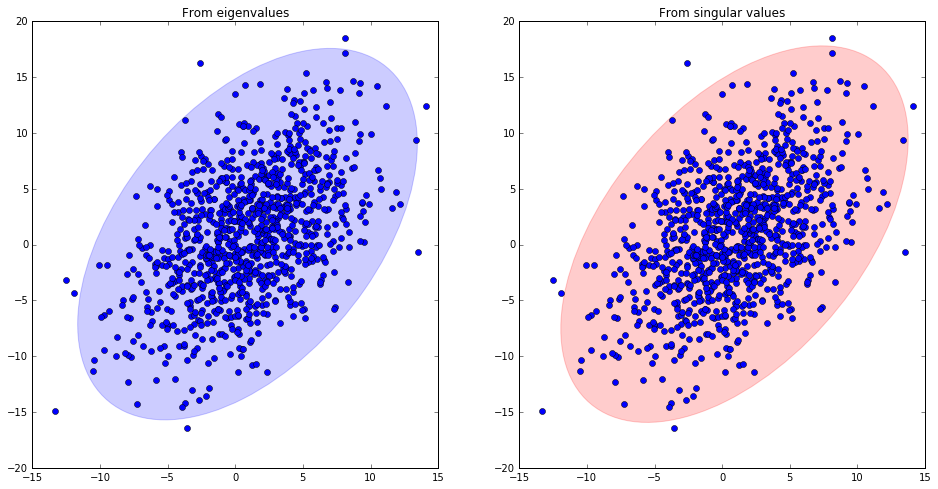

In [72]:
# Generate some random, correlated data
points = np.random.multivariate_normal(mean=(1,1), cov=[[18, 12],[12, 30]], size=1000)
pos = points.mean(axis=0)
# Plot the raw points...
x, y = points.T
fig = plt.figure(0, figsize=(16,8))
ax = fig.add_subplot(121)
ax.plot(x, y, 'bo')
plot_cov_ellipse(points, pos, nstd=3, alpha=0.2, color='blue')

ax = fig.add_subplot(122)
ax.plot(x, y, 'bo')
plot_svd_ellipse(points, pos, nstd=3, alpha=0.2, color='red')

plt.show()

In [61]:
data = np.random.multivariate_normal(mean=(1,1), cov=[[18, 12],[12, 30]], size=1000)
pos = points.mean(axis=0)
cov = np.cov(data, rowvar=False)
W, V_eig = np.linalg.eig(cov)
U, S, V_svd = np.linalg.svd(cov)
print("eigen vals:", W)
print("singular vals:", S)

eigen vals: [ 11.66430129  37.40685669]
singular vals: [ 37.40685669  11.66430129]
